In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv('datatraining.txt')
data= data.set_index('date')
data.index = pd.to_datetime(data.index)

In [29]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [68]:
print(data.corr().round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Temperature &  Humidity &  Light &    CO2 &  HumidityRatio &  Occupancy \\
\midrule
Temperature   &        1.000 &    -0.142 &  0.650 &  0.560 &          0.152 &      0.538 \\
Humidity      &       -0.142 &     1.000 &  0.038 &  0.439 &          0.955 &      0.133 \\
Light         &        0.650 &     0.038 &  1.000 &  0.664 &          0.230 &      0.907 \\
CO2           &        0.560 &     0.439 &  0.664 &  1.000 &          0.627 &      0.712 \\
HumidityRatio &        0.152 &     0.955 &  0.230 &  0.627 &          1.000 &      0.300 \\
Occupancy     &        0.538 &     0.133 &  0.907 &  0.712 &          0.300 &      1.000 \\
\bottomrule
\end{tabular}



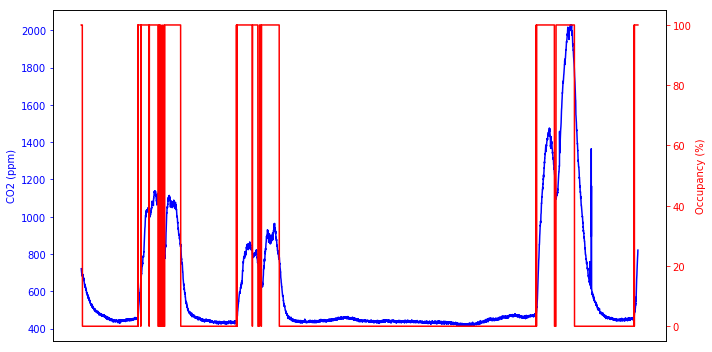

In [100]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot_date(y= data['CO2'], x = data.index, fmt = '-', color='b')
ax.set_ylabel('CO2 (ppm)', color='b')
ax.tick_params(axis='y', colors = 'b')
ax.tick_params(
    axis='x',         
    which='both',     
    bottom='off',     
    top='off',        
    labelbottom='off')

ax2 = ax.twinx()
ax2.plot_date(y= data['Occupancy']*100, x = data.index, fmt = '-', color='r')
ax2.set_ylabel('Occupancy (%)', color='r')
ax2.tick_params(axis='y', colors = 'r')
ax2.tick_params(
    axis='x',         
    which='both',     
    bottom='off',     
    top='off',        
    labelbottom='off')

fig.tight_layout()
plt.savefig('co.png')
plt.show()

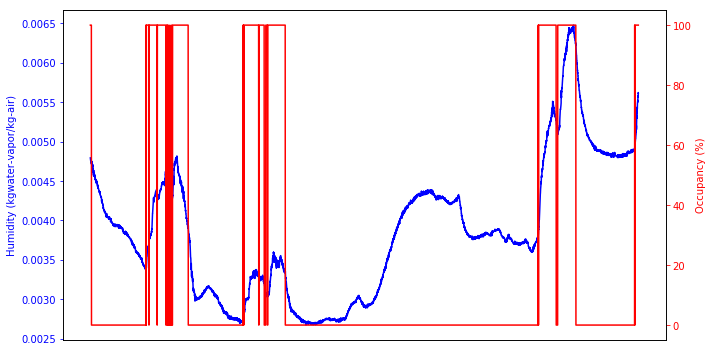

In [101]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot_date(y= data['HumidityRatio'], x = data.index, fmt = '-', color='b')
ax.set_ylabel('Humidity (kgwater-vapor/kg-air)', color='b')
ax.tick_params(axis='y', colors = 'b')
ax.tick_params(
    axis='x',         
    which='both',     
    bottom='off',     
    top='off',        
    labelbottom='off')

ax2 = ax.twinx()
ax2.plot_date(y= data['Occupancy']*100, x = data.index, fmt = '-', color='r')
ax2.set_ylabel('Occupancy (%)', color='r')
ax2.tick_params(axis='y', colors = 'r')
ax2.tick_params(
    axis='x',         
    which='both',     
    bottom='off',     
    top='off',        
    labelbottom='off')

fig.tight_layout()
plt.savefig('humid.png')
plt.show()

In [86]:
# change time resolution
newRes = data.resample('15T').mean()

In [102]:
newRes.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,20.621365,25.746742,120.234456,606.879541,0.003865,0.214091
std,1.018091,5.543277,191.601637,314.013566,0.000855,0.400961
min,19.082143,16.862143,0.000000,419.905952,0.002690,0.000000
25%,19.751125,20.188810,0.000000,438.886905,0.003081,0.000000
50%,20.443778,26.219783,0.000000,453.743403,0.003801,0.000000
75%,21.355288,30.554196,256.667188,644.754464,0.004358,0.000000
max,23.125556,39.009464,637.468750,2016.125000,0.006440,1.000000


In [106]:
print(newRes.describe().loc[['mean', 'std', '25%', '50%', '75%', 'max'],:].round(4).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Temperature &  Humidity &     Light &        CO2 &  HumidityRatio &  Occupancy \\
\midrule
mean &      20.6214 &   25.7467 &  120.2345 &   606.8795 &         0.0039 &     0.2141 \\
std  &       1.0181 &    5.5433 &  191.6016 &   314.0136 &         0.0009 &     0.4010 \\
25\%  &      19.7511 &   20.1888 &    0.0000 &   438.8869 &         0.0031 &     0.0000 \\
50\%  &      20.4438 &   26.2198 &    0.0000 &   453.7434 &         0.0038 &     0.0000 \\
75\%  &      21.3553 &   30.5542 &  256.6672 &   644.7545 &         0.0044 &     0.0000 \\
max  &      23.1256 &   39.0095 &  637.4688 &  2016.1250 &         0.0064 &     1.0000 \\
\bottomrule
\end{tabular}



In [78]:
newRes['discreteCO2'] = np.where(newRes.CO2 < 450, 0, np.where(newRes.CO2 < 650, 1, 2))

In [80]:
newRes['discreteHumidRatio'] = np.where(newRes.HumidityRatio < 0.0037, 0, np.where(newRes.HumidityRatio < 0.0044, 1, 2))

In [81]:
newRes.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,discreteCO2,discreteHumidRatio
date,,,,,,,,
2015-02-04 17:30:00,23.125556,27.220500,423.277778,705.833333,0.004768,1.000000,2,2
2015-02-04 18:00:00,22.838763,27.369892,94.596774,679.771505,0.004711,0.225806,2,2
2015-02-04 18:30:00,22.399655,27.407931,0.000000,630.025862,0.004593,0.000000,1,2
2015-02-04 19:00:00,22.179528,27.246000,0.000000,589.516667,0.004504,0.000000,1,2
2015-02-04 19:30:00,21.954274,27.118280,0.000000,555.833333,0.004422,0.000000,1,2
